Bag Of Word (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
corpus = [
  'This is the first document.',
  'This document is the second document.',
  'And this is the third one.',
  'Is this the first document?',
]

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 3))  #‘word’, ‘char’, ‘char_wb’
X2 = vectorizer2.fit_transform(corpus)

In [ ]:
vectorizer2.get_feature_names_out()

array(['and', 'and this', 'and this is', 'document', 'document is',
       'document is the', 'first', 'first document', 'is', 'is the',
       'is the first', 'is the second', 'is the third', 'is this',
       'is this the', 'one', 'second', 'second document', 'the',
       'the first', 'the first document', 'the second',
       'the second document', 'the third', 'the third one', 'third',
       'third one', 'this', 'this document', 'this document is',
       'this is', 'this is the', 'this the', 'this the first'],
      dtype=object)

In [ ]:
print(X2.toarray())

[[0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 2 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]]


TF_IDF

In [ ]:
vocabulary = ['this', 'document', 'first', 'is', 'second', 'the', 'and', 'one']

In [ ]:
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)), ('tfid', TfidfTransformer())]).fit(corpus)

In [ ]:
pipe['count'].transform(corpus).toarray()

array([[1, 1, 1, 1, 0, 1, 0, 0],
       [1, 2, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0]])

In [ ]:
pipe['tfid'].idf_

array([1.        , 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.        , 1.91629073, 1.91629073])

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
print(X)

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


In [ ]:
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 0)	-0.5773502691896258
  (0, 8)	-0.5773502691896258
  (0, 13)	0.5773502691896258
  (0, 14)	0.0
  (1, 0)	-0.8164965809277261
  (1, 11)	0.4082482904638631
  (1, 13)	0.4082482904638631
  (1, 14)	0.0
  (2, 4)	-0.7071067811865475
  (2, 5)	0.7071067811865475
  (2, 13)	0.0
  (2, 14)	0.0
  (3, 0)	-0.5773502691896258
  (3, 8)	-0.5773502691896258
  (3, 13)	0.5773502691896258
  (3, 14)	0.0


NLTK

In [ ]:
from nltk.stem import *
from nltk.stem.porter import *

In [ ]:
stemmer = PorterStemmer()

In [ ]:
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
           'died', 'agreed', 'owned', 'humbled', 'sized',
           'meeting', 'stating', 'siezing', 'itemization',
           'sensational', 'traditional', 'reference', 'colonizer',
           'plotted']

In [ ]:
singles = [stemmer.stem(plural) for plural in plurals]
print(' '.join(singles))

caress fli die mule deni die agre own humbl size meet state siez item sensat tradit refer colon plot


In [ ]:
from nltk.tree import *

In [ ]:
dp1 = Tree('dp', [Tree('d', ['the']), Tree('np', ['dog'])])
dp2 = Tree('dp', [Tree('d', ['the']), Tree('np', ['cat'])])
vp = Tree('vp', [Tree('v', ['chased']), dp2])
tree = Tree('s', [dp1, vp])

In [ ]:
tree.pretty_print()

              s               
      ________|_____           
     |              vp        
     |         _____|___       
     dp       |         dp    
  ___|___     |      ___|___   
 d       np   v     d       np
 |       |    |     |       |  
the     dog chased the     cat



In [ ]:
tree = Tree.fromstring('(S (NP I) (VP (V enjoyed) (NP my cookie)))')
tree.pretty_print()

             S                
  ___________|___              
 |               VP           
 |      _________|___          
 NP    V             NP       
 |     |          ___|____     
 I  enjoyed      my     cookie



In [ ]:
from nltk import Nonterminal, nonterminals, Production, CFG

In [ ]:
grammar = CFG.fromstring("""
  S -> NP VP
  PP -> P NP
  NP -> 'the' N | N PP | 'the' N PP
  VP -> V NP | V PP | V NP PP
  N -> 'cat'
  N -> 'dog'
  N -> 'rug'
  V -> 'chased'
  V -> 'sat'
  P -> 'in'
  P -> 'on'
""")

In [ ]:
sentence = 'the cat chased the dog on the rug'.split()

In [ ]:
from nltk.parse import RecursiveDescentParser
rd = RecursiveDescentParser(grammar)

In [ ]:
for t in rd.parse(sentence):
  print(t)

(S
  (NP the (N cat))
  (VP (V chased) (NP the (N dog) (PP (P on) (NP the (N rug))))))
(S
  (NP the (N cat))
  (VP (V chased) (NP the (N dog)) (PP (P on) (NP the (N rug)))))


In [ ]:
import nltk
nltk.parse.chart.demo(2, print_times=False, trace=1, sent='I saw a dog', numparses=1)

* Sentence:
I saw a dog
['I', 'saw', 'a', 'dog']

* Strategy: Bottom-up

|.    I    .   saw   .    a    .   dog   .|
|[---------]         .         .         .| [0:1] 'I'
|.         [---------]         .         .| [1:2] 'saw'
|.         .         [---------]         .| [2:3] 'a'
|.         .         .         [---------]| [3:4] 'dog'
|>         .         .         .         .| [0:0] NP -> * 'I'
|[---------]         .         .         .| [0:1] NP -> 'I' *
|>         .         .         .         .| [0:0] S  -> * NP VP
|>         .         .         .         .| [0:0] NP -> * NP PP
|[--------->         .         .         .| [0:1] S  -> NP * VP
|[--------->         .         .         .| [0:1] NP -> NP * PP
|.         >         .         .         .| [1:1] Verb -> * 'saw'
|.         [---------]         .         .| [1:2] Verb -> 'saw' *
|.         >         .         .         .| [1:1] VP -> * Verb NP
|.         >         .         .         .| [1:1] VP -> * Verb
|.         [--------->

In [ ]:
from nltk.corpus import treebank_chunk
from nltk.chunk import ne_chunk

In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 8.2 MB/s eta 0:00:00


In [ ]:
nltk.download('treebank')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

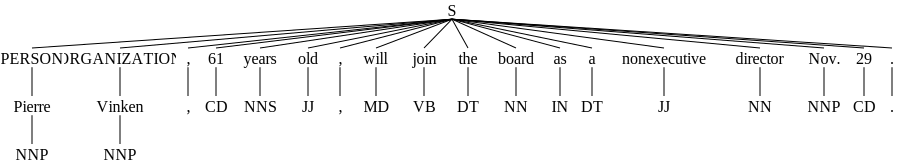

In [ ]:
ne_chunk(treebank_chunk.tagged_sents()[0])

In [ ]:
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

In [ ]:
nltk.download('state_union')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

In [ ]:
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)
tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [ ]:
def process_content():
    try:
        for i in tokenized[5:15]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            print(namedEnt)
            #break
            #namedEnt.draw()
    except Exception as e:
        print(str(e))

In [ ]:
process_content()

(S 31/CD ,/, 2006/CD ./.)
(S
  (NE White/NNP House/NNP)
  photo/NN
  by/IN
  (NE Eric/NNP)
  DraperEvery/NNP
  time/NN
  I/PRP
  'm/VBP
  invited/JJ
  to/TO
  this/DT
  rostrum/NN
  ,/,
  I/PRP
  'm/VBP
  humbled/VBN
  by/IN
  the/DT
  privilege/NN
  ,/,
  and/CC
  mindful/NN
  of/IN
  the/DT
  history/NN
  we/PRP
  've/VBP
  seen/VBN
  together/RB
  ./.)
(S
  We/PRP
  have/VBP
  gathered/VBN
  under/IN
  this/DT
  Capitol/NNP
  dome/NN
  in/IN
  moments/NNS
  of/IN
  national/JJ
  mourning/NN
  and/CC
  national/JJ
  achievement/NN
  ./.)
(S
  We/PRP
  have/VBP
  served/VBN
  (NE America/NNP)
  through/IN
  one/CD
  of/IN
  the/DT
  most/RBS
  consequential/JJ
  periods/NNS
  of/IN
  our/PRP$
  history/NN
  --/:
  and/CC
  it/PRP
  has/VBZ
  been/VBN
  my/PRP$
  honor/NN
  to/TO
  serve/VB
  with/IN
  you/PRP
  ./.)
(S
  In/IN
  a/DT
  system/NN
  of/IN
  two/CD
  parties/NNS
  ,/,
  two/CD
  chambers/NNS
  ,/,
  and/CC
  two/CD
  elected/JJ
  branches/NNS
  ,/,
  there/EX
  will/MD
 

GENSIM

In [ ]:
from nltk.test.gensim_fixt import setup_module
setup_module()

In [ ]:
import gensim
import nltk
nltk.download('brown')
nltk.download('word2vec_sample')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Unzipping models/word2vec_sample.zip.


True

In [ ]:
from nltk.corpus import brown

In [ ]:
train_set = brown.sents()[:10000]
model = gensim.models.Word2Vec(train_set)

In [ ]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [ ]:
len(new_model.wv['university'])

100

In [ ]:
new_model.wv.similarity('university','school') > 0.3

True

In [ ]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [ ]:
len(model['university'])

300

In [ ]:
model.most_similar(positive=['university'], topn = 3)

[('universities', 0.7003918886184692),
 ('faculty', 0.6780906915664673),
 ('undergraduate', 0.6587096452713013)]

In [ ]:
model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

[('queen', 0.7118192911148071)]

In [ ]:
model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1)

[('France', 0.7884092330932617)]

spaCy

In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.


In [ ]:
import spacy
from spacy import displacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


In [ ]:
displacy.serve(doc, style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
from spacy.matcher import Matcher

In [ ]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", [pattern])

In [ ]:
doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


NER

In [ ]:
texts = [
    "Net income was $9.4 million compared to the prior year of $2.7 million.",
    "Revenue exceeded twelve billion dollars, with a loss of $1b.",
]

In [ ]:
for doc in nlp.pipe(texts, disable=["tok2vec", "tagger",  "parser", "attribute_ruler", "lemmatizer"]):
    # Do something with the doc here
    print([(ent.text, ent.label_) for ent in doc.ents])

[('$9.4 million', 'MONEY'), ('the prior year', 'DATE'), ('$2.7 million', 'MONEY')]
[('twelve billion dollars', 'MONEY'), ('1b', 'MONEY')]
